In [183]:
from datetime import datetime
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret
from matplotlib import style
style.use('ggplot')

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [195]:
news_outlets = ["@BBC", '@CBS', '@CNN', '@FoxNews', '@NYTimes']

n_tweets = 100

sentiment = []
compound_list = []
neutral_list = []
positive_list = []
negative_list = []
name = []
counter_list = []
overall_compound =[]
overall_outlet = []
date = []
text = []
for outlet in news_outlets:
    overall_list = []
    overall_name = ''
    counter = 0
    for status in tweepy.Cursor(api.user_timeline, id=outlet, tweet_mode="extended").items(n_tweets):
        tweet = status._json
        result = analyzer.polarity_scores(tweet['full_text'])
        #get name, counter and compound scores
        name.append(tweet['user']['name'])
        compound_list.append(result['compound'])
        positive_list.append(result['pos'])
        negative_list.append(result['neg'])
        neutral_list.append(result['neu'])
        date.append(tweet['created_at'])
        text.append(tweet['full_text'])
        counter += 1
        counter_list.append(counter)        
        #get overall name and compound score to mean
        overall_list.append(result['compound'])
        overall_name = tweet['user']['name']
    overall_compound.append(np.mean(overall_list))
    overall_outlet.append(overall_name)
    
sentiment.append({
    "name": name,
    "compound_score" : compound_list,
    "date": date
    })


In [196]:
overall_df = pd.DataFrame({
    "News Outlet": overall_outlet,
    "Compound Score" : overall_compound,
    })
# overall_df

In [197]:
# compound_list

In [198]:
sentiment_df = pd.DataFrame({
    "name": name,
    "compound_score" : compound_list,
    "positive_score" : positive_list,
    "negative_score" : negative_list,
    "neutral_score" : neutral_list,
    "text": text,
    "date": date
    })
# sentiment_df.head(50)
# sentiment_df.columns

In [199]:
sentiment_df.to_csv("twitter_sentiment.csv")

In [200]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
# sentiment_df.head(100)

In [201]:
sentiment_df.sort_values("date", inplace=True, ascending=True)
sentiment_df.head()

,compound_score,date,name,negative_score,neutral_score,positive_score,text
199,0.7177,2018-03-01 14:15:29,CBS,0.000,0.800,0.200,".@ChrisStapleton, @ThomasRhett, @mirandalamber..."
198,0.7717,2018-03-01 14:29:20,CBS,0.000,0.675,0.325,RT @ACMawards: Please give a round of applause...
197,0.5994,2018-03-01 14:36:21,CBS,0.000,0.822,0.178,RT @ACMawards: Congratulations to this year’s ...
196,0.4885,2018-03-01 18:10:50,CBS,0.151,0.615,0.234,RT @KeithUrban: ACMs...... HOLY SMOKES!!!!! MA...
195,0.8591,2018-03-01 18:11:50,CBS,0.000,0.462,0.538,RT @KelseaBallerini: Ohhhhh goodness. Incredib...


In [202]:
# sentiment_df[sentiment_df['name'] == "CBS"]

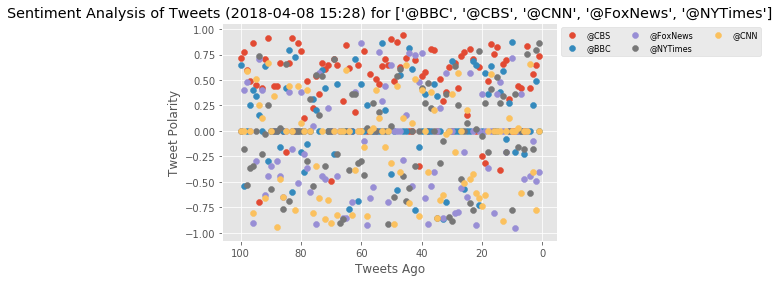

In [209]:
# plt.scatter(np.arange(-len(sentiment_df['date']), 0, 1), sentiment_df['compound_score'])

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['name'] == "CBS"]),0,1), 
            sentiment_df[sentiment_df['name'] == "CBS"]['compound_score'], label = "@CBS")

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['name'] == "BBC"]),0,1), 
            sentiment_df[sentiment_df['name'] == "BBC"]['compound_score'],  label = "@BBC")

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['name'] == "Fox News"]),0,1), 
            sentiment_df[sentiment_df['name'] == "Fox News"]['compound_score'], label = "@FoxNews")

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['name'] == "The New York Times"]),0,1), 
            sentiment_df[sentiment_df['name'] == "The New York Times"]['compound_score'],  label = "@NYTimes")

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['name'] == "CNN"]),0,1), 
            sentiment_df[sentiment_df['name'] == "CNN"]['compound_score'],  label = "@CNN")
# # Incorporate the other graph properties
# now = datetime.now()
# now = now.strftime("%Y-%m-%d %H:%M")

plt.title(f"Sentiment Analysis of Tweets ({now}) for {news_outlets}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])

plt.legend(scatterpoints=1,
           loc='upper left',
           bbox_to_anchor = (1,1),
           ncol=3,
           fontsize=8)
plt.savefig('SentimentOverTime.png')


In [204]:
overall_df[overall_df['News Outlet'] == 'BBC']['Compound Score'].values[0]
# sentiment_df[sentiment_df['name'] == "CBS"]


0.09136999999999999

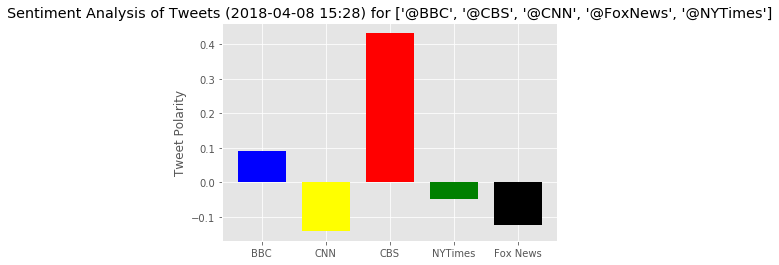

In [207]:
sentiment_mean = (overall_df[overall_df['News Outlet'] == 'BBC']['Compound Score'].values[0], 
                  overall_df[overall_df['News Outlet'] == 'CNN']['Compound Score'].values[0], 
                  overall_df[overall_df['News Outlet'] == 'CBS']['Compound Score'].values[0], 
                  overall_df[overall_df['News Outlet'] == 'The New York Times']['Compound Score'].values[0],
                  overall_df[overall_df['News Outlet'] == 'Fox News']['Compound Score'].values[0])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(sentiment_mean))  
width = .75
BBC = ax.bar(ind[0], sentiment_mean[0], width, color='blue')
CBS = ax.bar(ind[2], sentiment_mean[2], width, color='red')
CNN = ax.bar(ind[1], sentiment_mean[1], width, color='yellow')
NYTimes = ax.bar(ind[3], sentiment_mean[3], width, color='green')
FoxNews = ax.bar(ind[4], sentiment_mean[4], width, color='black')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('Tweet Polarity')
ax.set_title(f"Sentiment Analysis of Tweets ({now}) for {news_outlets}")
ax.set_xticks(ind)
ax.set_xticklabels(('BBC', 'CNN', 'CBS', 'NYTimes', 'Fox News'))
ax.set_autoscaley_on(True)
ax.grid(True)
plt.savefig('TweetPolarityByOutlet.png')


In [194]:
# plt.bar(overall_df['News Outlet'], overall_df['Compound Score'])

# # # Incorporate the other graph properties
# now = datetime.now()
# now = now.strftime("%Y-%m-%d %H:%M")
# plt.title(f"Sentiment Analysis of Tweets ({now}) for {news_outlets}")
# plt.ylabel("Tweet Polarity")
# plt.xlabel("News Outlet")
